# The Essential Parameters behind Student Academic Success
## by Olusola Timothy Ogundepo

## Investigation Overview

In this investigation, I wanted to look at the effect of parental background (such degree, income, and occupation status), student possession, and student interest toward student academic performance. The main focus  will be on how many features contribute to student performance in their academics.


## Dataset Overview

The pisa dataset contains over 400,000 responses from different students with more than 600 features. But for the purpose of this analysis and visualization, I will be using 200,000 samples of the dataset with 29 features. The features are of variety of format such as nominal, ordinal, discrete, continuous, text etc.,

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# load in the dataset into a pandas dataframe
pisa_df = pd.read_csv('process_data.csv')

### All identified ordinal categorical features are to be placed in order

In [3]:
def order_cat(columns: list, order: list =None):
    """Order all columns scale in the right order"""
    if not order:
        order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
    for col in columns:
        pisa_df[col] = pd.Categorical(pisa_df[col], categories=order, ordered=True)

sch_lvl = ['She did not complete <ISCED level 1>','He did not complete <ISCED level 1>']
for col, lvl in zip(['mother_sch_lvl', 'father_sch_lvl'], sch_lvl):
    order_cat([col], order=[lvl,'ISCED level 1', 'ISCED level 2',
                                    'ISCED level 3A', 'ISCED level 3B, 3C'])

job_status = ['mother_job_status', 'father_job_status']

order_cat(job_status, order=['Not working, but looking for a job', 
                            'Other (e.g. home duties, retired)', 'Working part-time <for pay>', 
                            'Working full-time <for pay>'])
order_cat(['pri_sch'], 
            order=['No', 'Yes, for one year or less', 'Yes, for more than one year'])

possession = pisa_df.columns[pisa_df.columns.str.startswith('possess')]
order_cat(possession, order=['No', 'Yes'])

math_related = pisa_df.columns[pisa_df.columns.str.startswith('math')]

order_cat(math_related[:2])


### Distribution of students score in their Examinations

The total scores in examination is roundly between 200 and 700 with a mean examination score mostly between (470-480) and a standard deviation of (101-102).

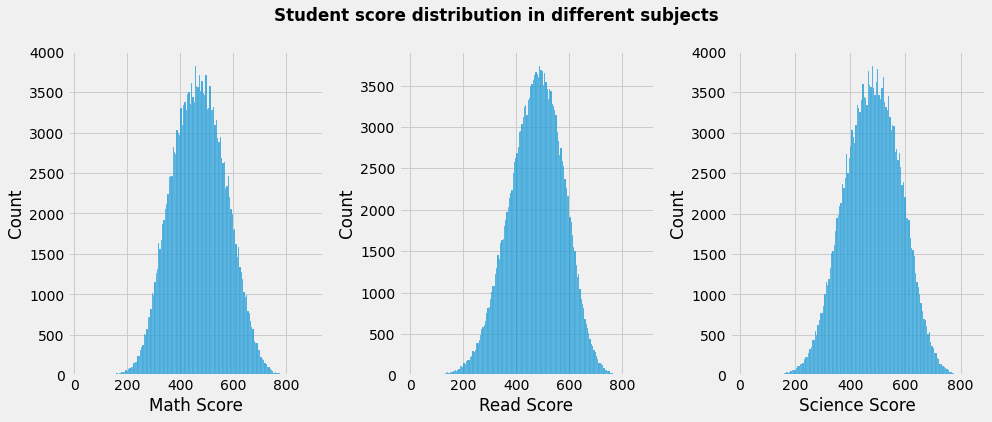

In [4]:
def score_distribution():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
    cols = ['math_score', 'read_score', 'science_score']
    for i, ax in enumerate(axes):
        g = sb.histplot(data=pisa_df, x=cols[i], ax=ax)
        g.set_xlabel(g.get_xlabel().replace("_", " ").title())
    plt.suptitle('Student score distribution in different subjects', fontweight='bold')
    plt.tight_layout();

score_distribution()

### Students age distribution in Primary school

The age of most students during their primary education falls between the 4–8 age bracket, with fewer students older than that.

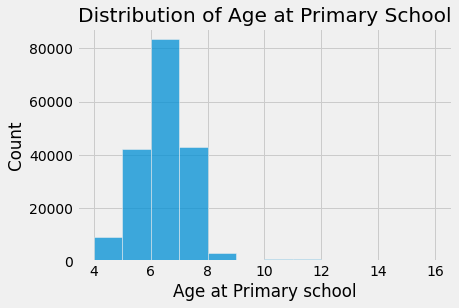

In [5]:
bin_size = np.arange(4, 17, 1)
g = sb.histplot(data=pisa_df, x='age_at_pri_sch', bins=bin_size)
g.set_xlabel('Age at Primary school')
g.set_title('Distribution of Age at Primary School');

### Early Education Influence on Student performance in Academics

When a student's basic school foundation is strong, their performance will always be exceptional. This study has contributed to the confirmation that children perform better academically the sooner they begin their schooling.

In [6]:
def age_influence_plot(score, p='Blues_r'):
    fig, ax = plt.subplots(figsize=(15, 6))
    sb.boxenplot(data=pisa_df, x='age_at_pri_sch', y=score, palette=p, ax=ax)
    plt.xlabel('Age at Primary School')
    plt.ylabel(score.replace('_', " ").title())
    plt.title("Early education influence on Education")

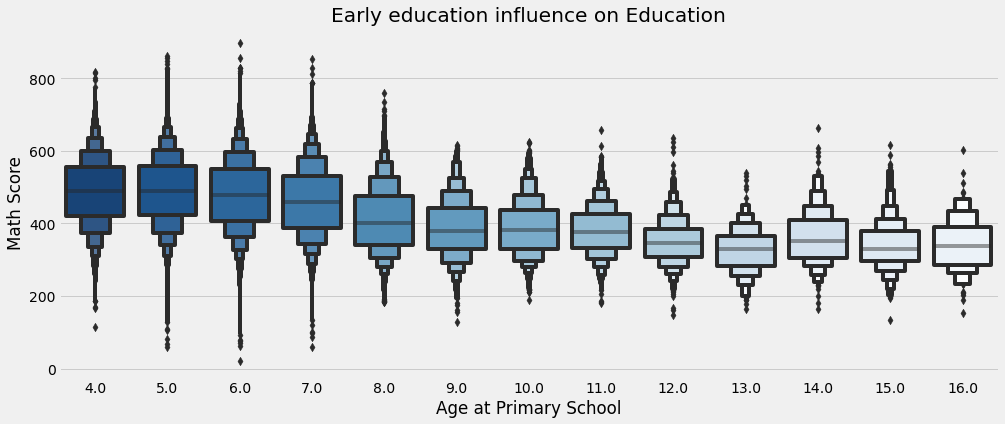

In [7]:
age_influence_plot('math_score')

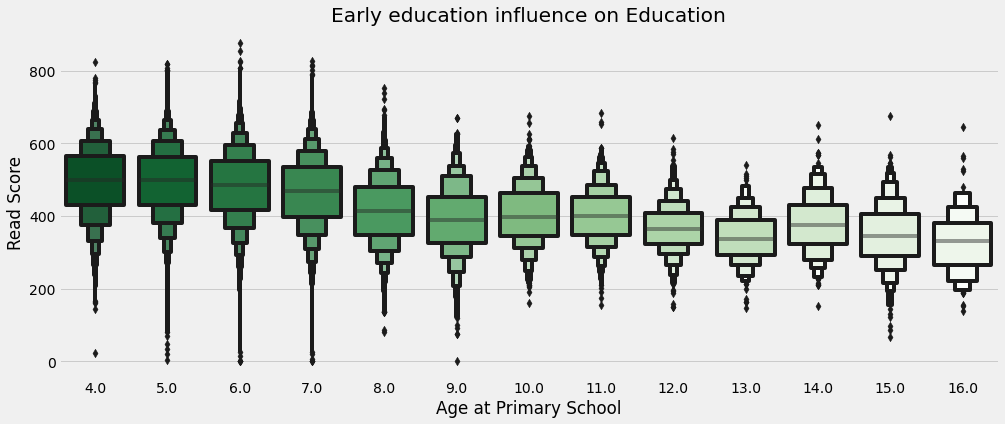

In [8]:
age_influence_plot('read_score', p='Greens_r')

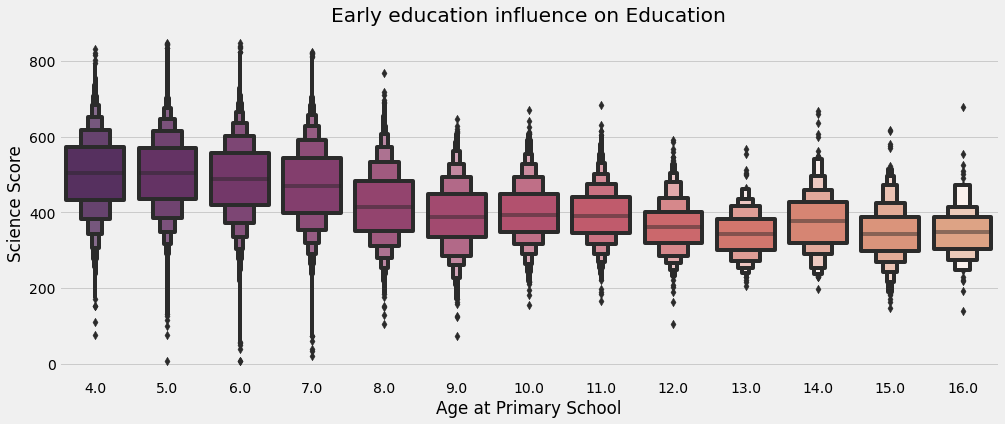

In [9]:
age_influence_plot('science_score', p='flare_r')

## Effect of Parent Academic Degree on Students Performance

The way an educated parent will handle education for their children will be quite different from that of illiterate who has little or no expectaction for education which makes most students in this study with highly educated parents to outshine students with illiterate or lower degree parents.

In [10]:
def parent_degree_inf(col):
    """
        Parent degree influence on student performance
    """
    fig, axis = plt.subplots(nrows=2, figsize=(9, 12))
    g = sb.boxplot(data=pisa_df, y=col, x='math_score', palette='viridis_r', ax=axis[0])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

    g = sb.pointplot(data=pisa_df, y=col, x='read_score', palette='viridis_r', ax=axis[1])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title(),
            )
    plt.suptitle('Effect of parent degree on student edcuation performance')

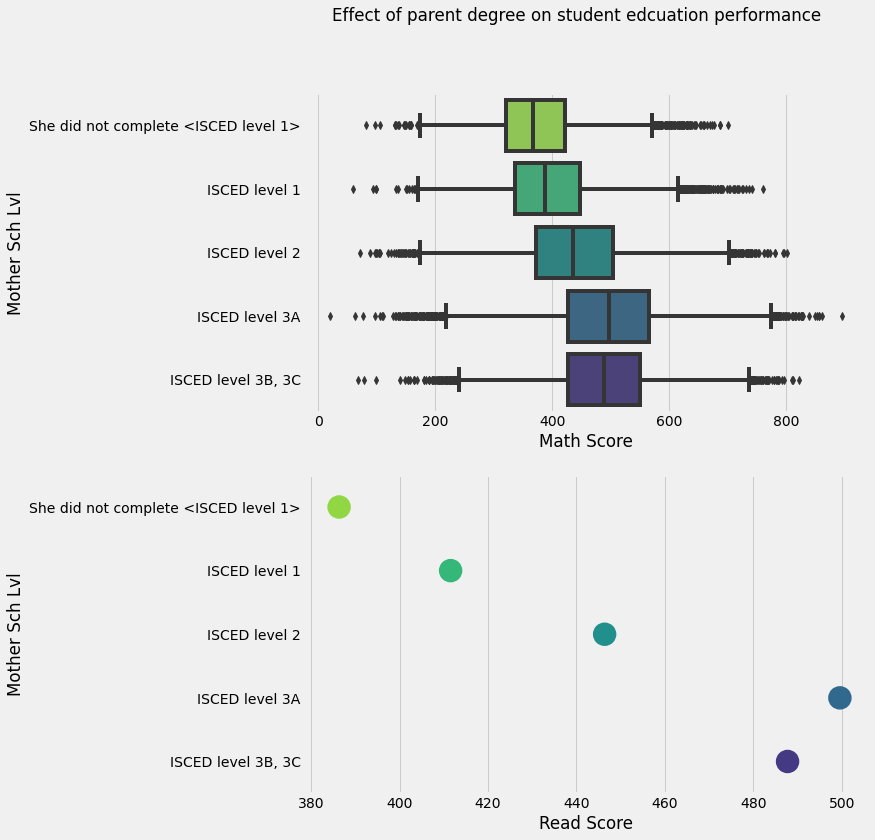

In [11]:
parent_degree_inf('mother_sch_lvl')

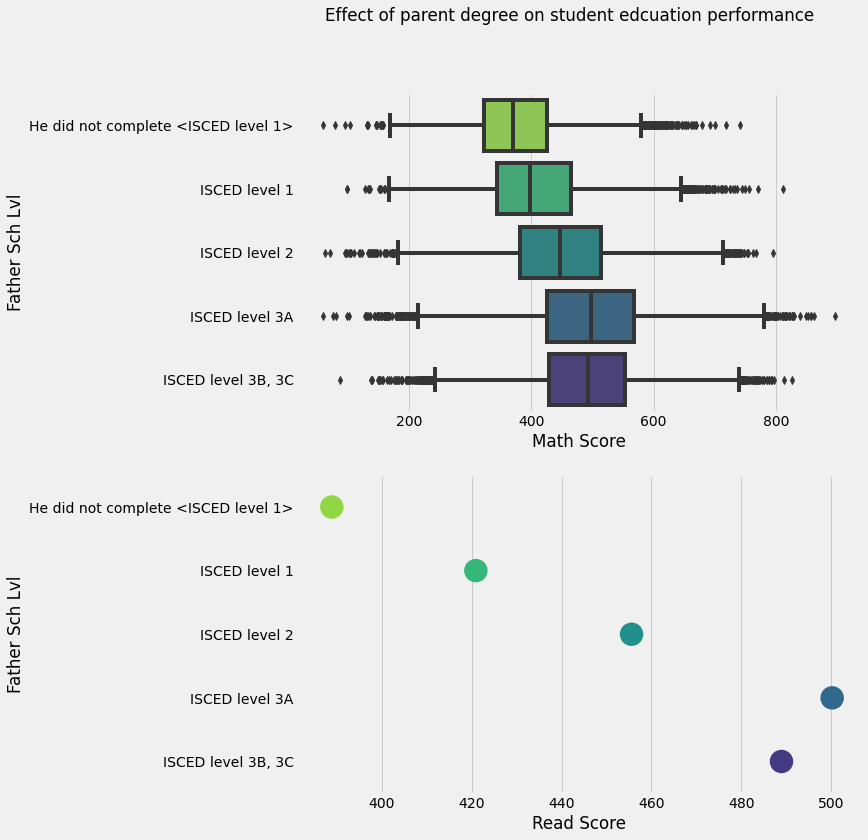

In [12]:
parent_degree_inf('father_sch_lvl')

## Impact of students Possessions on their Academic Performance

Most students that have a higher score in their examinations possess a study room, a computer, the internet, and a textbook. It's possible that students without computers, internet, and textbooks do borrow from their friends that have because they also try. 

In [13]:
plt.style.use('seaborn')
def possess_score(subject='math_score', data=pisa_df, color='Blues'):
    fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(13, 4))
    subj_cap = subject.replace("_", " ").title()
    for index, ax in enumerate(axis):
        g = sb.barplot(data=data, 
                            x=possession[index], y=subject,
                                ax=ax, palette=color)
        
        g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
                ylabel=subj_cap)
        ax.bar_label(ax.containers[0], fmt="%.2f", label_type='center', color='white')
    plt.suptitle(f"{subj_cap} vs Student Possession")
    plt.tight_layout()

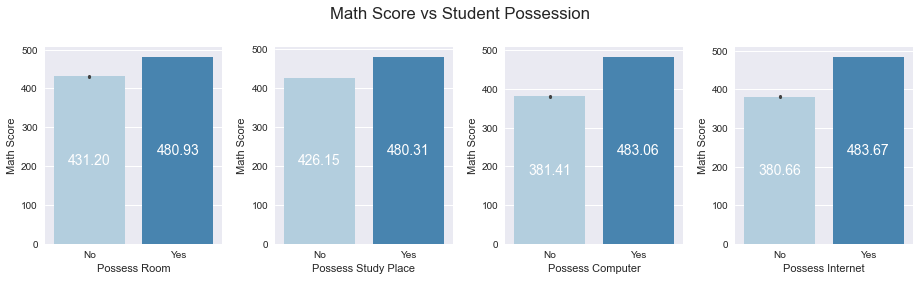

In [14]:
possess_score()

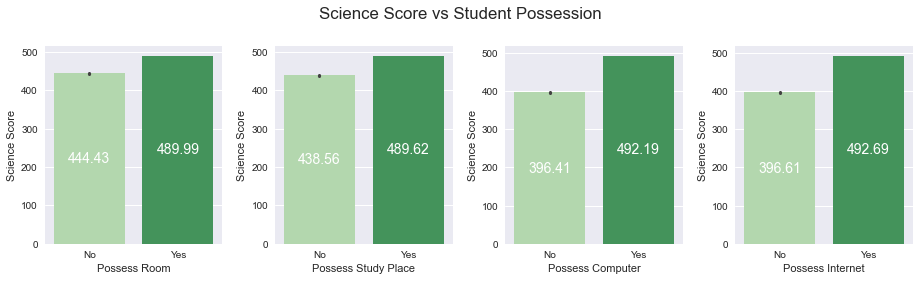

In [15]:
possess_score('science_score', color='Greens')

Students with all the basic amenities perform more than those without in science examinations.

### Influence of Primary Education of Student Academic Performance

There is a significant increase in the scores of students based on their experience in primary education. Primary education contributes excellently to the performance of students in their secondary examinations.

In [16]:
def primary_edu_plot(x):
    sb.violinplot(data=pisa_df, y='pri_sch', x=x, inner='quartile', palette='Greens')
    plt.ylabel('Attend Primary Education')
    plt.xlabel(x.replace('_', " ").title())
    plt.title("Effect of years spent in Primary Education\nOn\nStudent's performance")

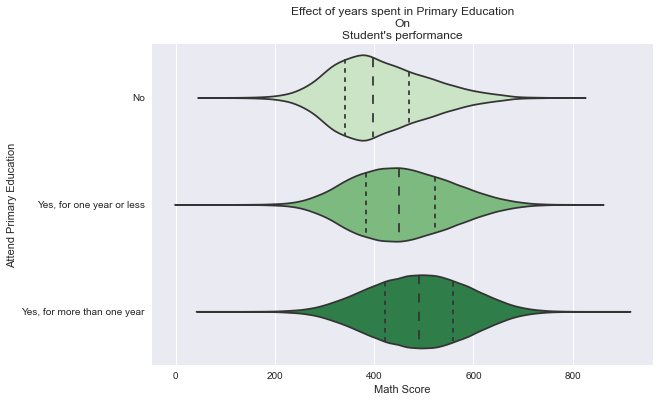

In [17]:
primary_edu_plot('math_score')

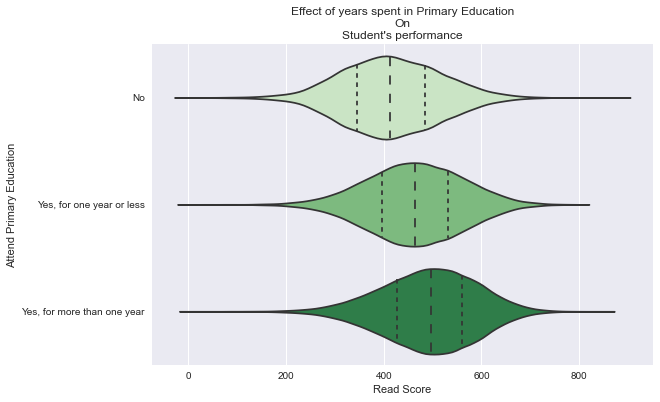

In [18]:
primary_edu_plot('read_score')

### Effect of Parent Employment Status on Student Performance

Students with a parent looking for a job tend to perform quite little as compared to those with full-time working parents. It is safe to say parent occupation is related to student performance.

In [19]:
def parent_emp_inf():
    """
        Parent employment influence on student performance
    """
    fig, axis = plt.subplots(nrows=2, figsize=(7, 9))
    g = sb.violinplot(data=pisa_df, y='father_job_status', x='math_score', inner='quartile', palette='Blues', ax=axis[0])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())

    g = sb.boxenplot(data=pisa_df, y='mother_job_status', x='read_score', palette='Greens', ax=axis[1])
    g.set(xlabel=g.get_xlabel().replace("_", " ").title(),
            ylabel=g.get_ylabel().replace("_", " ").title())
    plt.suptitle('Effect of Parent Job Status on Student Performance')

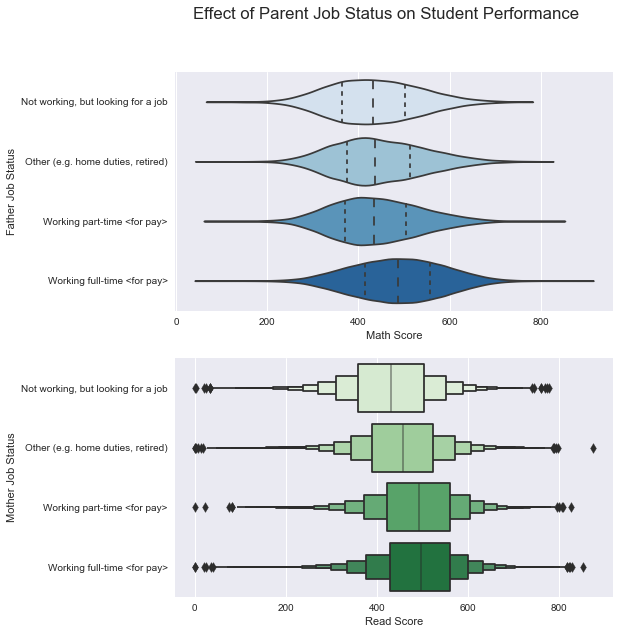

In [20]:
parent_emp_inf()

### Parent Earning effect on Student Education Performance

There is a slight upward trend between parent earnings and the performance of students in education. But this dedunction is not always the case because there are some students with low-earning parents who are intelligent enough to perform better in examinations. As can be seen from the visual, some students with low-earning parents also perform quite well!

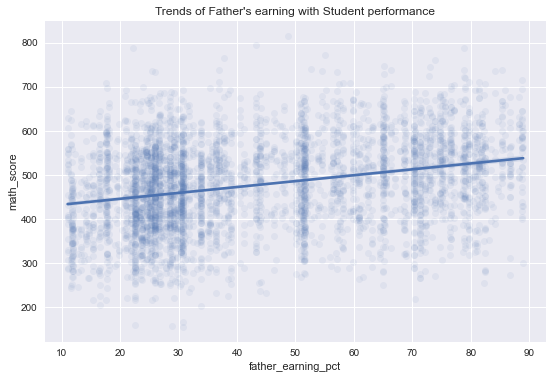

In [21]:
sb.regplot(data=pisa_df.sample(5000), x='father_earning_pct', y='math_score', scatter_kws={'alpha': 0.07})
plt.title("Trends of Father's earning with Student performance");

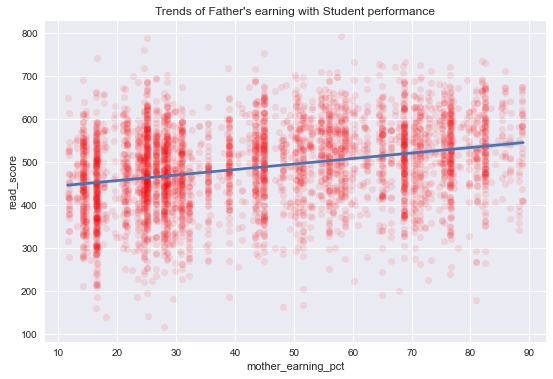

In [22]:
sb.regplot(data=pisa_df.sample(5000), x='mother_earning_pct', y='read_score', scatter_kws={'alpha': 0.1, 'color': 'r'})
plt.title("Trends of Father's earning with Student performance");

### Possession of study place effect on Student Performance

Most students that perform well in mathematics have a place of study regardless of the years spent in primary education, i.e., there is a relationship between a student's possession of a study place and their performance in academics.

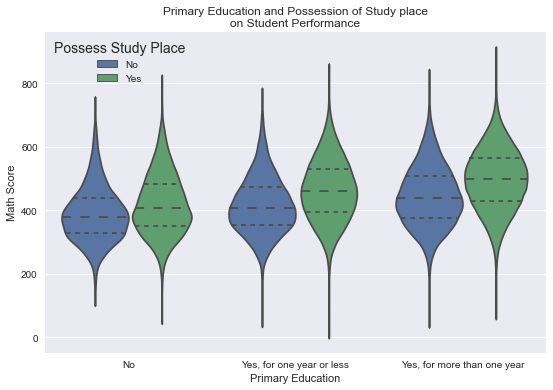

In [23]:
g = sb.violinplot(data=pisa_df, x='pri_sch', y='math_score', hue='possess_study_place', inner='quartile')
g.set(xlabel="Primary Education", ylabel="Math Score", title="Primary Education and Possession of Study place\non Student Performance")
plt.legend(loc=2, title="Possess Study Place");

### Student Interest effect on their Performance in Examination

It is clear that the stronger the interest of students in mathematics, the higher their exam scores. And this logic applies to both males and females, i.e., it is not gender specific.

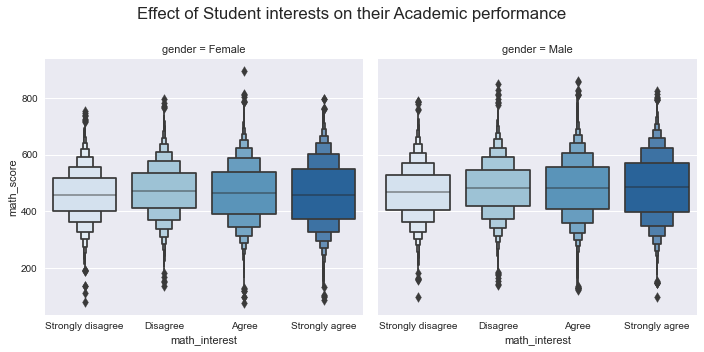

In [24]:
g = sb.FacetGrid(data=pisa_df, col='gender', aspect=1, height=5)
g.map(sb.boxenplot, 'math_interest', 'math_score', palette='Blues')
plt.suptitle('Effect of Student interests on their Academic performance')
plt.tight_layout();

## Conclusions

When a student's basic school foundation is strong, their performance will always be exceptional. This study has contributed to the confirmation that children perform better academically the sooner they begin their schooling. Because most values that will contribute to knowledge demand money, parent education and occupation has a significant impact on their children's academic and vocational performance. As is widely known, literate parents will approach schooling very differently than uneducated parents. Most students who have a reading room, a book to read, a computer to conduct research on, and access to the internet to browse do well in school and achieve higher exam scores, but this is quite different for general knowledge (international examination) because every student has a different area of strength and weakness.

Results demonstrate that a student's performance is significantly influenced by how interested they are in a study. Students do better when they get more interested in a subject. Overall, parents' involvement in their children's education has a significant impact on how well they succeed.